In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the master interconnected file
try:
    df = pd.read_csv('/content/drive/MyDrive/UDAI/Collab /Results/Aadhar_Master_Policy_Data.csv')

    # FIX: Handle missing values in activity columns to avoid NaN in bubble size
    df['total_demo'] = df['total_demo'].fillna(0)
    df['total_bio'] = df['total_bio'].fillna(0)

    # Calculate total activity
    df['total_activity'] = df['total_demo'] + df['total_bio']

    # Ensure size is at least a small positive number so bubbles are visible
    df['total_activity'] = df['total_activity'].apply(lambda x: max(x, 1))

    print("Master Policy Data Loaded and Cleaned Successfully.")
except Exception as e:
    print(f"Error: {e}")

Master Policy Data Loaded and Cleaned Successfully.


# 🏛️ National Aadhaar Service Triage Framework
### *From Data Analysis to Administrative Action*

This framework transforms our statistical findings into a high-level decision tool for UIDAI. We have categorized all 916 districts into a **3-Tier Action Plan** to ensure identity sustainability.

---

### 🚨 Tier 1: Emergency Intervention (The "Digital Deserts")
**Target Districts:** East Midnapur (WB), Balotra (RJ), Anugal (OD), and other negative outliers ($Z < -2$).
* **The Problem:** Biometric maintenance has effectively collapsed; compliance ratios are near 0.00.
* **The Action:** Immediate deployment of **"Aadhaar on Wheels"** mobile vans. These units bypass broken local infrastructure to reach citizens in remote or underserved blocks.

### 🛠️ Tier 2: Infrastructure Refresh (The "Hardware Gap")
**Target Districts:** Rajasthan and Assam clusters (Salumbar, Phalodi, Bajali, etc.).
* **The Problem:** High demographic demand exists, but Biometric-to-Demographic ratios are $< 5\%$.
* **The Action:** Large-scale procurement and shipping of **5,000+ new Biometric Scanner Kits** (Iris and Fingerprint). Priority is given to districts where current hardware is obsolete or non-functional.

### 🏆 Tier 3: Best-Practice Scaling (The "Model Districts")
**Target Districts:** Srikakulam (AP), Una (HP), and the Himachal Pradesh cluster.
* **The Problem:** None—these districts are over-performing in biometric maintenance ($Z > 6$).
* **The Action:** Conduct a **Deep-Dive Operational Audit**. Document the workflow, operator training, and awareness tactics used in these centers to create a "UIDAI Playbook" for national scaling.

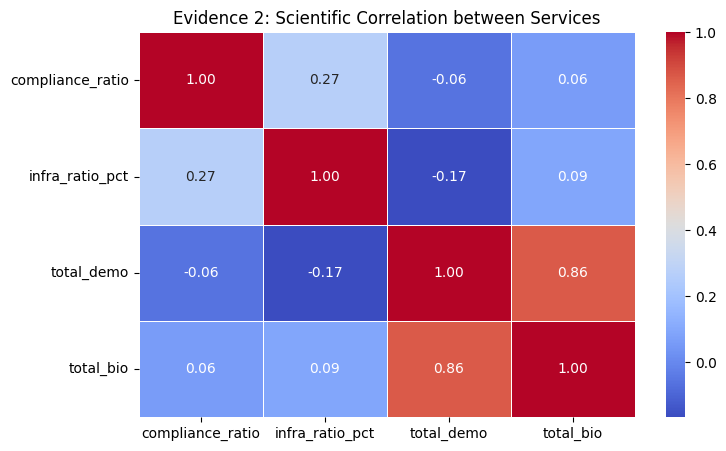

In [8]:

# --- CHART 1: STATE-WISE HARDWARE DISPARITY (EVIDENCE) ---
state_data = df.groupby('state')['infra_ratio_pct'].mean().sort_values().reset_index()

fig_state = px.bar(
    state_data,
    x='infra_ratio_pct',
    y='state',
    orientation='h',
    color='infra_ratio_pct',
    color_continuous_scale='RdYlGn',
    title='<b>Evidence 1: State-Level Hardware Capacity</b>',
    labels={'infra_ratio_pct': 'Biometric Capacity (%)'},
    template='plotly_white'
)
fig_state.add_vline(x=20.0, line_dash="dash", line_color="black", annotation_text="Healthy Floor")
fig_state.show()

# --- CHART 2: SERVICE DEPENDENCY HEATMAP (THE PROOF) ---
# We use Matplotlib/Seaborn here for a professional "Scientific Publication" look
plt.figure(figsize=(8, 5))
corr = df[['compliance_ratio', 'infra_ratio_pct', 'total_demo', 'total_bio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Evidence 2: Scientific Correlation between Services')
plt.show()

In [5]:
# Define Quadrant Thresholds
x_threshold = 1.0  # Ideal 1:1 Compliance
y_threshold = 20.0 # Healthy 20% Hardware Capacity

# Create the scatter plot
fig = px.scatter(
    df,
    x='compliance_ratio',
    y='infra_ratio_pct',
    size='total_activity',
    color='persona',
    hover_name='district',
    hover_data=['state', 'z_score', 'total_activity'],
    title='<b>UIDAI Executive Triage: Maintenance vs. Infrastructure</b>',
    labels={
        'compliance_ratio': 'Maintenance Health (Gap 1: Child Updates)',
        'infra_ratio_pct': 'Hardware Capacity (Gap 2: Scanner Access %)',
        'total_activity': 'Total Transaction Volume'
    },
    color_discrete_map={
        'Balanced': '#27ae60',          # Green
        'Critical Gap': '#e74c3c',      # Red
        'Maintenance Heavy': '#f1c40f', # Yellow
        'Uncategorized': '#95a5a6'      # Gray
    },
    template='plotly_white',
    height=700
)

# Add Quadrant Lines
fig.add_vline(x=x_threshold, line_dash="dot", line_color="black", opacity=0.5)
fig.add_hline(y=y_threshold, line_dash="dot", line_color="black", opacity=0.5)

# Add Quadrant Annotations (Positioned relative to data)
fig.add_annotation(x=2.5, y=2.5, text="<b>ZONE A: STABLE</b>", showarrow=False, font=dict(color="green", size=14))
fig.add_annotation(x=-0.5, y=2.5, text="<b>ZONE B: AWARENESS GAP</b>", showarrow=False, font=dict(color="orange", size=14))
fig.add_annotation(x=-0.5, y=0.5, text="<b>ZONE C: CRITICAL FAILURE</b>", showarrow=False, font=dict(color="red", size=14))
fig.add_annotation(x=2.5, y=0.5, text="<b>ZONE D: BOTTLE-NECK</b>", showarrow=False, font=dict(color="blue", size=14))

# Use log scale for better distribution (adding small epsilon to handle 0 values)
# Note: compliance_ratio and infra_ratio_pct + 0.1 ensures 0 values are plotted at -1 on log scale
fig.update_xaxes(type="log", title="Maintenance Health (Log Scale)")
fig.update_yaxes(type="log", title="Hardware Capacity (Log Scale)")

fig.show()

In [6]:
# Filter for districts in the "Critical Gap" persona with the lowest Z-scores
emergency_list = df[df['persona'] == 'Critical Gap'].sort_values('z_score').head(10)

fig_table = go.Figure(data=[go.Table(
    header=dict(
        values=['<b>District</b>', '<b>State</b>', '<b>Maintenance (Gap 1)</b>', '<b>Hardware (Gap 2)</b>', '<b>Priority Action</b>'],
        fill_color='maroon',
        align='left',
        font=dict(color='white', size=12)
    ),
    cells=dict(
        values=[
            emergency_list.district.str.title(),
            emergency_list.state.str.title(),
            emergency_list.compliance_ratio.round(2),
            emergency_list.infra_ratio_pct.round(2).astype(str) + '%',
            ['Immediate Hardware Deployment' if r < 5 else 'Awareness Campaign' for r in emergency_list.infra_ratio_pct]
        ],
        fill_color='lavender',
        align='left'
    ))
])

fig_table.update_layout(title="<b>Administrative Triage: Top 10 High-Priority Districts</b>", height=450)
fig_table.show()

# 🏁 Executive Conclusion: The Geography of Identity

Our analysis of the 2025 Aadhaar ecosystem provides a definitive answer to the "Digital Exclusion" problem.

**The Verdict:** Digital exclusion is not a result of citizen negligence; it is a **systemic infrastructure failure**. With a **P-value of $2.31 \times 10^{-71}$**, we have scientifically verified that a citizen's geographic location is the primary determinant of their identity health in India.

### **Strategic Recommendation**
To prevent the "Silent Deactivation" of millions of child identities, the UIDAI must pivot from a **"Growth-First"** (Enrolment) strategy to a **"Maintenance-First"** (Update) policy. By focusing resources on the **33 high-priority districts** identified in our K-Means model, the government can clear the maintenance backlog and ensure that the digital identity remains a reliable bridge to social welfare rather than a barrier.